In [1]:
!pip install pyarabic
!pip install datasets
!pip install transformers
!pip install -U accelerate
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.1/519.1 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 40.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 44.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.2/404.2 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.3/225.3 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import pickle
import nltk
from pyarabic import araby
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from datasets import Dataset

In [3]:
with open('train.pkl', 'rb') as f:
    X_train = pickle.load(f)

with open('test.pkl', 'rb') as f:
    X_test = pickle.load(f)

In [4]:
label_to_class = {
    0: 'none',
    1: 'anger',
    2: 'joy',
    3: 'sadness',
    4: 'love',
    5: 'sympathy',
    6: 'surprise',
    7: 'fear'
}

classes = ['none', 'anger', 'joy', 'sadness', 'love', 'sympathy', 'surprise', 'fear']

In [5]:
X_train.head()

,tweet,label,tweet_with_out_emojis,cleaned_data,Light Stemming,Root Stemming
1426,شايف نفسه الحمار مع انه كان احتياط الموسم الما...,1,شايف نفسه الحمار مع انه كان احتياط الموسم الما...,شايف الحمار انه احتياط الموسم الماضي اليوفي اد...,شايف حمار انه احتياط موسم ماضي يوفي اداره ريال...,شيف حمر انه حيط وسم اضي يوف دره ريل امر غرب هج...
496,: هزق البلد كلها ..مرتضي محدش عارف يوقفه ..ل...,1,: هزق البلد كلها ..مرتضي محدش عارف يوقفه ..ل...,هزق البلد مرتضي محدش عارف يوقفه لا وزير داخليه...,هزق بلد مرتضي محدش عارف يوقفه لا وزير داخليه ش...,هزق بلد رضي حدش عرف وقف لا وزر دخل شبب حتي بتع...
3464,استفتاء : عندما تنتهي الاوليمبياد وتعود بعثتنا...,0,استفتاء : عندما تنتهي الاوليمبياد وتعود بعثتنا...,استفتاء تنتهي الاوليمبياد وتعود بعثتنا بالسلام...,استفتاء تنتهي اوليمبياد وتعود بعثت سلامه ميدال...,فاء نهي اوليمبياد تعد بعث سلم يدل حصل وجه نظر
7073,Alhashemلا يوجد مخرج لنفط داعش سوي تركيا.هكذا ...,1,Alhashemلا يوجد مخرج لنفط داعش سوي تركيا.هكذا ...,لا يوجد مخرج لنفط داعش سوي تركياهكذا تقول الجغ...,لا يوجد مخرج لنفط داعش سوي تركياهكذا تقول جغرا...,لا وجد خرج نفط دعش سوي تركياهكذا تقل جغراف سؤل...
758,ما احب اركب جاهل معاي السياره عادي اتوتر طول م...,7,ما احب اركب جاهل معاي السياره عادي اتوتر طول م...,ما احب اركب جاهل معاي السياره عادي اتوتر طول م...,ما احب اركب جاهل معاي سياره عادي اتوتر طول ما ...,ما احب ركب جهل عاي سير عدي وتر طول ما انا اسق ...


In [6]:
X_train['length'] = X_train['Light Stemming'].apply(lambda x:len(araby.tokenize(x)))

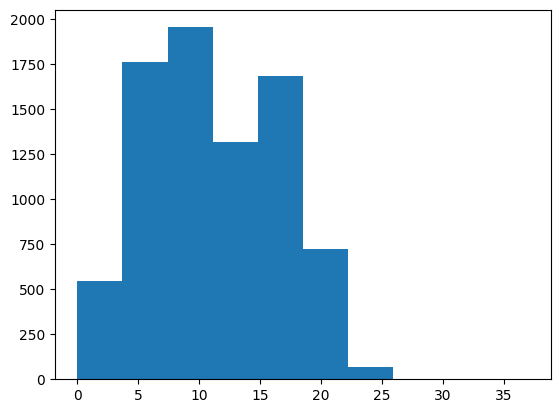

In [7]:
#histogram of tweets lengthes
plt.hist(X_train['length'])
plt.show()

In [8]:
sorted(X_train.query("length > 25")['length'].values)

[26, 26, 26, 37]

In [9]:
X_train = X_train[['Light Stemming', 'label']]
y_train = X_train['label']
X_test = X_test[['Light Stemming', 'label']]
y_test = X_test['label']

In [10]:
X_train.shape, X_test.shape

((8052, 2), (2013, 2))

In [11]:
X_test, X_dev, y_test, y_dev = train_test_split(X_test, y_test, shuffle=True, test_size=0.5)

In [12]:
X_test.shape, X_dev.shape

((1006, 2), (1007, 2))

In [13]:
X_train

,Light Stemming,label
1426,شايف حمار انه احتياط موسم ماضي يوفي اداره ريال...,1
496,هزق بلد مرتضي محدش عارف يوقفه لا وزير داخليه ش...,1
3464,استفتاء تنتهي اوليمبياد وتعود بعثت سلامه ميدال...,0
7073,لا يوجد مخرج لنفط داعش سوي تركياهكذا تقول جغرا...,1
758,ما احب اركب جاهل معاي سياره عادي اتوتر طول ما ...,7
...,...,...
5734,احمد احمر اوحش لاعب اوليمبياد اخره تضخيم ناس و...,3
5191,انتي قصدك عليا,6
5390,يا جدع سمحت مش واحد ميت ام عقده نفسيه يروح داخ...,1
860,هتودي دهيا يابلال ارحم ده مش قلش,1


In [14]:
X_train = X_train.rename_axis('id')
X_test = X_test.rename_axis('id')
X_dev = X_dev.rename_axis('id')

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
X_dev = X_dev.reset_index(drop=True)

In [15]:
X_train = Dataset.from_pandas(X_train)
X_test = Dataset.from_pandas(X_test)
X_dev = Dataset.from_pandas(X_dev)
X_train, X_test, X_dev

(Dataset({
     features: ['Light Stemming', 'label'],
     num_rows: 8052
 }),
 Dataset({
     features: ['Light Stemming', 'label'],
     num_rows: 1006
 }),
 Dataset({
     features: ['Light Stemming', 'label'],
     num_rows: 1007
 }))

In [16]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_checkpoint = "asafaya/bert-base-arabic"

tokenizer = AutoTokenizer.from_pretrained(model_checkpoint, use_fast=True)

In [17]:
model_init = lambda: AutoModelForSequenceClassification.from_pretrained(model_checkpoint, num_labels=8)

In [18]:
def tokenize_function(examples):
    return tokenizer(examples["Light Stemming"], padding="max_length", truncation=True, max_length=37)

X_train = X_train.map(tokenize_function, batched=True, num_proc = 8)
X_dev = X_test.map(tokenize_function, batched=True, num_proc = 8)
X_test = X_test.map(tokenize_function, batched=True, num_proc = 8)

Map (num_proc=8):   0%|          | 0/8052 [00:00<?, ? examples/s]

Map (num_proc=8):   0%|          | 0/1006 [00:00<?, ? examples/s]

Map (num_proc=8):   0%|          | 0/1006 [00:00<?, ? examples/s]

In [19]:
X_train

Dataset({
    features: ['Light Stemming', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 8052
})

In [20]:
import numpy as np
from sklearn.metrics import (accuracy_score,
                             f1_score,
                             confusion_matrix,
                             precision_score,
                             recall_score
                             )

def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    assert len(preds) == len(p.label_ids)

    macro_f1 = f1_score(p.label_ids,preds,average='macro', zero_division=1)
    macro_precision = precision_score(p.label_ids,preds,average='macro', zero_division=1)
    macro_recall = recall_score(p.label_ids,preds,average='macro', zero_division=1)
    acc = accuracy_score(p.label_ids,preds)
    return {
      'macro_f1' : macro_f1,
      'macro_precision': macro_precision,
      'macro_recall': macro_recall,
      'accuracy': acc
    }

In [21]:
from transformers import TrainingArguments, Trainer, EarlyStoppingCallback, IntervalStrategy

batch_size = 32
logging_steps = 100

training_args = TrainingArguments(output_dir="./train")
training_args.do_train = True
training_args.evaluate_during_training = True
# training_args.per_device_train_batch_size = batch_size
# training_args.per_device_eval_batch_size = batch_size
training_args.evaluation_strategy = IntervalStrategy.STEPS
# training_args.num_train_epochs = num_epochs
training_args.logging_steps = logging_steps
training_args.eval_steps = logging_steps
training_args.save_steps = 500
training_args.save_total_limit = 5
# training_args.seed = 42
training_args.load_best_model_at_end=True
training_args.metric_for_best_model = 'macro_f1'

In [22]:
trainer = Trainer(
    model_init=model_init,
    args=training_args,
    train_dataset=X_train,
    eval_dataset=X_dev,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at asafaya/bert-base-arabic and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [23]:
best_run = trainer.hyperparameter_search(n_trials=10, direction="maximize")
best_run

[I 2023-08-08 10:31:36,028] A new study created in memory with name: no-name-c9fd6528-09a8-423c-a2e0-ce306e8ea089
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at asafaya/bert-base-arabic and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss,Validation Loss,Macro F1,Macro Precision,Macro Recall,Accuracy
100,1.993600,1.823757,0.340402,0.491449,0.379058,0.410537
200,1.738300,1.571788,0.379919,0.522739,0.461057,0.482107
300,1.550800,1.427993,0.441261,0.600162,0.513622,0.524851
400,1.416000,1.368078,0.497494,0.585958,0.547251,0.553678
500,1.317300,1.285625,0.508907,0.548556,0.563215,0.566600
600,1.298500,1.222834,0.542147,0.576203,0.581659,0.583499
700,1.264900,1.178967,0.572913,0.606649,0.592532,0.602386
800,1.205500,1.177192,0.554346,0.610348,0.586403,0.595427


[I 2023-08-08 10:33:19,163] Trial 0 finished with value: 2.3465244837914256 and parameters: {'learning_rate': 5.820510528768036e-06, 'num_train_epochs': 1, 'seed': 13, 'per_device_train_batch_size': 4}. Best is trial 0 with value: 2.3465244837914256.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at asafaya/bert-base-arabic and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss,Validation Loss,Macro F1,Macro Precision,Macro Recall,Accuracy
100,1.591600,1.146602,0.577511,0.594670,0.606638,0.612326
200,1.080400,1.049822,0.601396,0.630315,0.630129,0.631213
300,0.946900,0.981125,0.637286,0.658254,0.650379,0.656064
400,0.840600,0.959027,0.656792,0.675312,0.667690,0.671968
500,0.799600,0.933359,0.665579,0.678812,0.675760,0.679920


[I 2023-08-08 10:35:36,766] Trial 1 finished with value: 2.7000714622742823 and parameters: {'learning_rate': 1.889998247119138e-05, 'num_train_epochs': 2, 'seed': 24, 'per_device_train_batch_size': 32}. Best is trial 1 with value: 2.7000714622742823.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at asafaya/bert-base-arabic and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss,Validation Loss,Macro F1,Macro Precision,Macro Recall,Accuracy
100,1.457100,1.114593,0.565843,0.600661,0.602404,0.609344
200,1.046500,1.008874,0.625243,0.648321,0.642943,0.648111


[I 2023-08-08 10:36:42,602] Trial 2 finished with value: 2.564617675975311 and parameters: {'learning_rate': 2.655428626297517e-05, 'num_train_epochs': 1, 'seed': 7, 'per_device_train_batch_size': 32}. Best is trial 1 with value: 2.7000714622742823.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at asafaya/bert-base-arabic and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss,Validation Loss,Macro F1,Macro Precision,Macro Recall,Accuracy
100,1.201300,0.973545,0.645335,0.654120,0.652043,0.657058
200,0.755400,0.941474,0.676908,0.685749,0.680507,0.680915


[I 2023-08-08 10:38:36,818] Trial 3 finished with value: 2.7240784234224416 and parameters: {'learning_rate': 7.491474509025835e-05, 'num_train_epochs': 2, 'seed': 15, 'per_device_train_batch_size': 64}. Best is trial 3 with value: 2.7240784234224416.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at asafaya/bert-base-arabic and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss,Validation Loss,Macro F1,Macro Precision,Macro Recall,Accuracy
100,1.434500,1.204577,0.534200,0.552531,0.580430,0.589463
200,1.109700,1.068975,0.616225,0.650579,0.621016,0.632207
300,1.025200,1.051897,0.615032,0.628544,0.629825,0.631213
400,0.975500,1.017589,0.621464,0.658861,0.636952,0.644135
500,0.990900,1.002661,0.647721,0.674746,0.658538,0.661034
600,0.693600,0.983816,0.666310,0.679562,0.675985,0.676938
700,0.654400,0.980350,0.655607,0.676169,0.665681,0.666004
800,0.625300,0.950169,0.685958,0.694559,0.688748,0.690855


[I 2023-08-08 10:41:04,042] Trial 4 finished with value: 2.760119411251029 and parameters: {'learning_rate': 5.222226175470349e-05, 'num_train_epochs': 2, 'seed': 2, 'per_device_train_batch_size': 16}. Best is trial 4 with value: 2.760119411251029.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at asafaya/bert-base-arabic and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss,Validation Loss,Macro F1,Macro Precision,Macro Recall,Accuracy
100,1.912700,1.654867,0.432879,0.478558,0.486634,0.503976


[I 2023-08-08 10:41:50,564] Trial 5 pruned. 
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at asafaya/bert-base-arabic and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss,Validation Loss,Macro F1,Macro Precision,Macro Recall,Accuracy
100,2.010400,1.907331,0.245456,0.346002,0.316375,0.332008


[I 2023-08-08 10:42:03,844] Trial 6 pruned. 
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at asafaya/bert-base-arabic and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss,Validation Loss,Macro F1,Macro Precision,Macro Recall,Accuracy
100,1.896900,1.691208,0.410552,0.485651,0.470666,0.494036


[I 2023-08-08 10:42:51,388] Trial 7 pruned. 
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at asafaya/bert-base-arabic and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss,Validation Loss,Macro F1,Macro Precision,Macro Recall,Accuracy
100,1.198600,1.039095,0.644438,0.653178,0.644112,0.647117
200,0.789900,0.979253,0.668755,0.688633,0.674332,0.676938


[I 2023-08-08 10:44:45,653] Trial 8 finished with value: 2.7086591276113 and parameters: {'learning_rate': 9.867453684501672e-05, 'num_train_epochs': 2, 'seed': 34, 'per_device_train_batch_size': 64}. Best is trial 4 with value: 2.760119411251029.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at asafaya/bert-base-arabic and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss,Validation Loss,Macro F1,Macro Precision,Macro Recall,Accuracy
100,1.965800,1.773625,0.339937,0.588978,0.433854,0.455268


[I 2023-08-08 10:45:03,447] Trial 9 pruned. 


BestRun(run_id='4', objective=2.760119411251029, hyperparameters={'learning_rate': 5.222226175470349e-05, 'num_train_epochs': 2, 'seed': 2, 'per_device_train_batch_size': 16}, run_summary=None)

In [24]:
for n, v in best_run.hyperparameters.items():
    setattr(trainer.args, n, v)

trainer.train()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at asafaya/bert-base-arabic and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss,Validation Loss,Macro F1,Macro Precision,Macro Recall,Accuracy
100,1.434500,1.204577,0.534200,0.552531,0.580430,0.589463
200,1.109700,1.068975,0.616225,0.650579,0.621016,0.632207
300,1.025200,1.051897,0.615032,0.628544,0.629825,0.631213
400,0.975500,1.017589,0.621464,0.658861,0.636952,0.644135
500,0.990900,1.002661,0.647721,0.674746,0.658538,0.661034
600,0.693600,0.983816,0.666310,0.679562,0.675985,0.676938
700,0.654400,0.980350,0.655607,0.676169,0.665681,0.666004
800,0.625300,0.950169,0.685958,0.694559,0.688748,0.690855


TrainOutput(global_step=800, training_loss=0.9386584043502808, metrics={'train_runtime': 143.622, 'train_samples_per_second': 112.128, 'train_steps_per_second': 7.018, 'total_flos': 243162658440384.0, 'train_loss': 0.9386584043502808, 'epoch': 1.59})

In [25]:
trainer.evaluate()

{'eval_loss': 1.0026606321334839,
 'eval_macro_f1': 0.6477207519574525,
 'eval_macro_precision': 0.6747461249799535,
 'eval_macro_recall': 0.6585377167840729,
 'eval_accuracy': 0.6610337972166997,
 'eval_runtime': 2.8294,
 'eval_samples_per_second': 355.547,
 'eval_steps_per_second': 44.532,
 'epoch': 1.59}

In [26]:
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [27]:
X_test

Dataset({
    features: ['Light Stemming', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 1006
})

In [28]:
from torch.utils.data import TensorDataset, DataLoader

input_ids = [i['input_ids'] for i in X_test]
attention_masks = [i['attention_mask'] for i in X_test]

inputs = torch.tensor(input_ids)
masks = torch.tensor(attention_masks)Root Stemming
test_data = TensorDataset(inputs, masks)

test_dataloader = DataLoader(test_data, batch_size=batch_size)

In [29]:
from sklearn.metrics import classification_report

model = trainer.model
model.eval()
model.to(device)

outputs = []
for input, masks in test_dataloader:
    torch.cuda.empty_cache()

    input = input.to(device)
    masks = masks.to(device)

    output = model(input, attention_mask=masks)['logits']
    predictions = torch.argmax(output, dim=1)
    predictions = predictions.cpu().detach().numpy()

    outputs.extend(predictions)

print(classification_report(X_test['label'], outputs, target_names=classes))

              precision    recall  f1-score   support

        none       0.59      0.88      0.71       146
       anger       0.55      0.88      0.67       128
         joy       0.64      0.30      0.41       138
     sadness       0.57      0.39      0.46       132
        love       0.76      0.69      0.73       124
    sympathy       0.85      0.77      0.80        94
    surprise       0.49      0.45      0.47       106
        fear       0.95      0.90      0.93       138

    accuracy                           0.66      1006
   macro avg       0.67      0.66      0.65      1006
weighted avg       0.67      0.66      0.65      1006

